In [1]:
import numpy as np
import pymc as pm
import arviz as az

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
import  matplotlib as plt
import pandas as pd

In [2]:
X = np.array([1,0,0,1,0])
print(X)

[1 0 0 1 0]


In [3]:
model = pm.Model()

with model:
    p = pm.Uniform('p', lower=0.0, upper=1.0)
    
    X_obs = pm.Bernoulli('X_obs', p=p, observed=X)

In [11]:
with model:
    idata1_1 = pm.sample(chains=3, tune=2000, draws=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [p]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [12]:
with model:
    idata1_2 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


AttributeError: module 'matplotlib' has no attribute 'tight_layout'

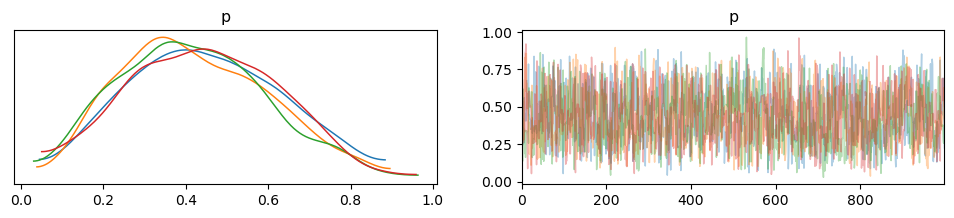

In [13]:
az.plot_trace(idata1_2, compact=False)
plt.tight_layout();

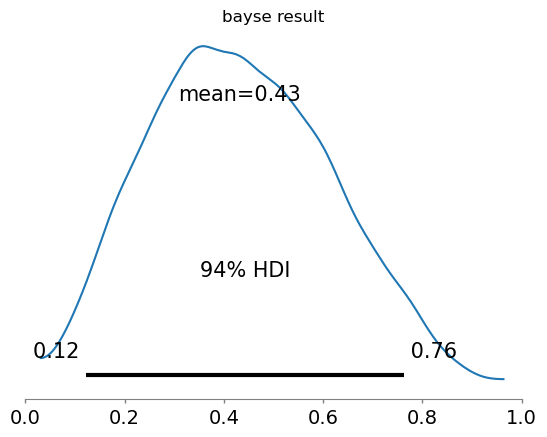

In [14]:
ax = az.plot_posterior(idata1_2)
ax.set_xlim(0,1)
ax.set_title('bayse result');

In [15]:
summary1_2 = az.summary(idata1_2)
display(summary1_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.432,0.177,0.123,0.764,0.004,0.003,1662.0,2567.0,1.0
